Sentiment Analysis 
==================
presented by: [Diane López] (https://github.com/dianita956) 
April 2, 2025
CEDISH - University of Texas at San Antonio Libraries

### Sentiment Analysis for Academic Research
Sentiment analysis is also widely used in academic research to analyze large volumes of text data, 
such as student feedback, academic publications, and social media interactions related to educational topics. 
It helps in understanding trends, opinions, and the overall sentiment in the academic community.

## Workshop Agenda
1. 10 min check-in- How are you doing?
2. 20-30 min set-up- launching your IDE: Anaconda, Jupyter Notebook, or Google Colab or preferred IDE. 
3. 5-10 min- Introduction to Sentiment Analysis
4. 5 min break/check in
4. 30 min- Hands-on exercise: Analyzing Sentiment in Text Data
5. 5-10 min- Wrap-up and Q&A

### table of contents:
Introduction to Sentiment Analysis
- Sentiment Analysis Techniques
- Sentiment Analysis Tools

Sentiment Analysis in Python

Conclusion

## Introduction to Sentiment Analysis

### Techniques

* **Lexicon-based: Uses predefined word lists associated with sentiments.**

* Machine Learning: Models trained on labeled data (e.g., Naive Bayes, SVM).

* Deep Learning: Uses advanced neural networks like RNNs and CNNs for complex sentiment patterns.

* Hybrid: Combines lexicon-based and ML approaches for better accuracy.

### Tools
1. NLTK: Advanced library with various sentiment analysis tools.
    - Matplotlib or Plotly: For visualization of sentiment scores.
2. Spacy: Advanced NLP library with sentiment analysis capabilities.

    - displaCy: For visualizing dependency trees and named entities. 


### Documentation for which tool can be found at: 
* NLTK: https://www.nltk.org/install.html
* Spacy: https://spacy.io/usage

## Sentiment Analysis in Python

First thing first, we need to install the libraries we will be using. Today will be using nltk, spacy, and matplotlib. 

In [1]:
import nltk
import matplotlib.pyplot as plt # plt is the shortname for matplotlib this makes it easier to call in the code 
import re


## Creating your own sentiment calculator

In [5]:
#building a simple Spanish Lexicon (dictionary) 
#postive words score greater > than 0
#negative words score less < than 0
#neutral words score equal = to 0


positive_words = [
    'bueno', 'mágico', 'paz', 'amistad', 'deseo', 'feliz', 'alegría', 'amor', 
    'hermoso', 'éxito', 'satisfacción', 'genial', 'increíble', 'niña', 'pueblo', 
    'bosque', 'criaturas', 'hada', 'regreso', 'naturaleza'
]
negative_words = ['triste', 'odio', 'miedo', 'fracaso', 'desastre', 'decepción', 'perderse', 'desaparecer', 'nerviosa' ]
neutral_words = ['normal', 'regular', 'común', 'promedio', 'típico', 'estándar'  'niña', 'pueblo', 'bosque', 'criaturas', 'hada', 'regreso', 'naturaleza', 'foto']

#creating a dictionary with the words and their scores
lexicon = {}
for word in positive_words: # the colon indicates that the next block of code should be repeated a number of times. iterate thru the list
    lexicon[word] = 1
for word in negative_words:
    lexicon[word] = -1
for word in neutral_words:
    lexicon[word] = 0 

#checking lexicon dictionary and word score
#print(lexicon)

#creating a function to calculate the sentiment score of a text 
def calculate_sentiment(text):
    #tokenizing the text using regex and lowercasing and find words
    tokens = re.findall(r'\b\w+\b', text.lower())
    #store works and scores in a dictionary
    word_scores = {}
    total_score = 0 

    for word in set(tokens): # set() is a Python built-in function used to create a set object. A set is unorder and part of data types: list, tuples,, and dictionary. it help to remoive dups. 
        if word in lexicon:
            word_scores[word] = lexicon[word] #creating a list to store words and its score
            total_score = total_score + lexicon[word]
            #print(total_score)
    
    for word, score in word_scores.items():
        print(f"{word}:{score}")

    #calculate sentiment score: 1 = positive, -1 = negative, 0 = neutral
    return total_score, word_scores

#example text
with open('SylviaGonzalez_CasaLatina.txt', 'r', encoding='utf-8') as f:
    text = f.read()

#calcuating sentiment score
sentiment_score, word_scores = calculate_sentiment(text)
print(f"Sentiment Score: {sentiment_score}")

amor:1
foto:0
bueno:1
hermoso:1
odio:-1
satisfacción:1
increíble:1
éxito:1
Sentiment Score: 5


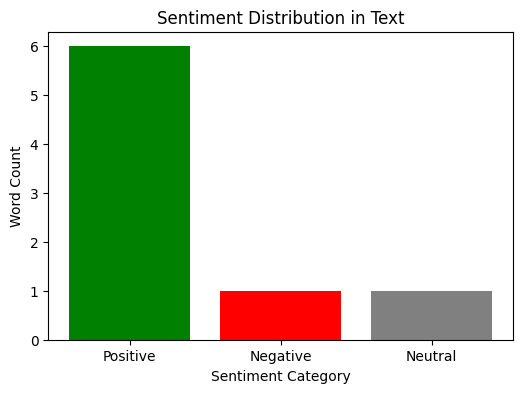

In [6]:

# Counting positive, negative, and neutral words
positive_count = sum(1 for word, score in lexicon.items() if word in word_scores and score > 0)
negative_count = sum(1 for word, score in lexicon.items() if word in word_scores and score < 0)
neutral_count = sum(1 for word, score in lexicon.items() if word in word_scores and score == 0)

# Creating a bar chart
categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

plt.figure(figsize=(6, 4))
plt.bar(categories, counts, color=['green', 'red', 'gray'])
plt.xlabel('Sentiment Category')
plt.ylabel('Word Count')
plt.title('Sentiment Distribution in Text')
plt.show()


In [7]:
#example text
with open('Sofia.txt', 'r', encoding='utf-8') as f:
    text2 = f.read()

#calcuating sentiment score
sentiment_score, word_scores = calculate_sentiment(text2)
print(f"Sentiment Score: {sentiment_score}")



paz:1
deseo:1
amor:1
pueblo:0
niña:1
criaturas:0
nerviosa:-1
hada:0
mágico:1
perderse:-1
bosque:0
Sentiment Score: 3


## Sentiment Word Counts 

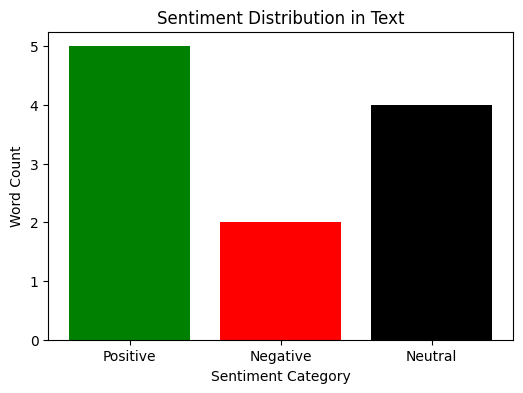

In [8]:
 # Counting positive, negative, and neutral words
positive_count = sum(1 for word, score in lexicon.items() if word in word_scores and score > 0)
negative_count = sum(1 for word, score in lexicon.items() if word in word_scores and score < 0)
neutral_count = sum(1 for word, score in lexicon.items() if word in word_scores and score == 0)

# Creating a bar chart
categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

plt.figure(figsize=(6, 4))
plt.bar(categories, counts, color=['green', 'red', 'black'])
plt.xlabel('Sentiment Category')
plt.ylabel('Word Count')
plt.title('Sentiment Distribution in Text')
plt.show()


## NLTK